In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from modwt import modwt, imodwt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

df = pd.read_csv("Tractor_Sales.csv",index_col = 0,parse_dates = [0],date_parser = parser)
df.head()

,Sales
Month,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [3]:
df.size

144

Text(0.5, 1.0, 'Tractor Sales')

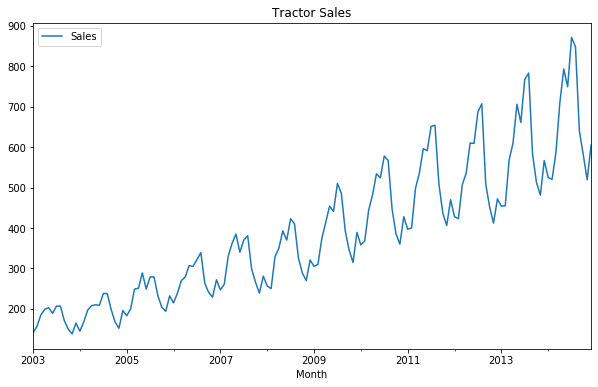

In [4]:
df.plot()
plt.title('Tractor Sales')

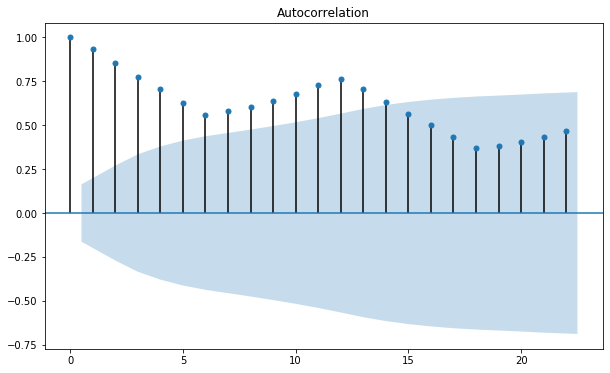

In [5]:
plot_acf(df)
plt.show()

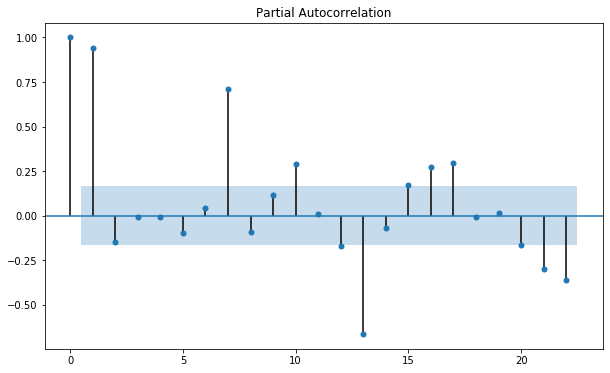

In [6]:
plot_pacf(df)
plt.show()

In [7]:
def Dickey_fuller(timeseries):
    print("-> Result of Dickey fuller Test :")
    print("======================================")
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','# Lags Used','No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]= value
    print(dfoutput)
    return dfoutput[1]

p_val = Dickey_fuller(df.Sales)
print("--------------------------------------")
if(p_val > 0.05):
    print("-> Not Stationary")
else:
    print("-> Stationary")

-> Result of Dickey fuller Test :
Test Statistics               1.108825
p-value                       0.995291
# Lags Used                  14.000000
No. of observations used    129.000000
Critical Value(1%)           -3.482088
Critical Value(5%)           -2.884219
Critical Value(10%)          -2.578864
dtype: float64
--------------------------------------
-> Not Stationary


In [8]:
import itertools
import warnings
warnings.filterwarnings('ignore')

def order_p_d_q(train):
    order = 0
    para = 0
    p=d=q = range(0,10)
    pdq = list(itertools.product(p,d,q))
    for param in pdq:
        try:
            model_arima = ARIMA(train,param)
            model_arima_fit = model_arima.fit()
            aic = model_arima_fit.aic
            if(order == 0 or aic > -order and aic < order):
                order = aic
                para = param
        except:
            continue
    print(para,order)
    return(para)

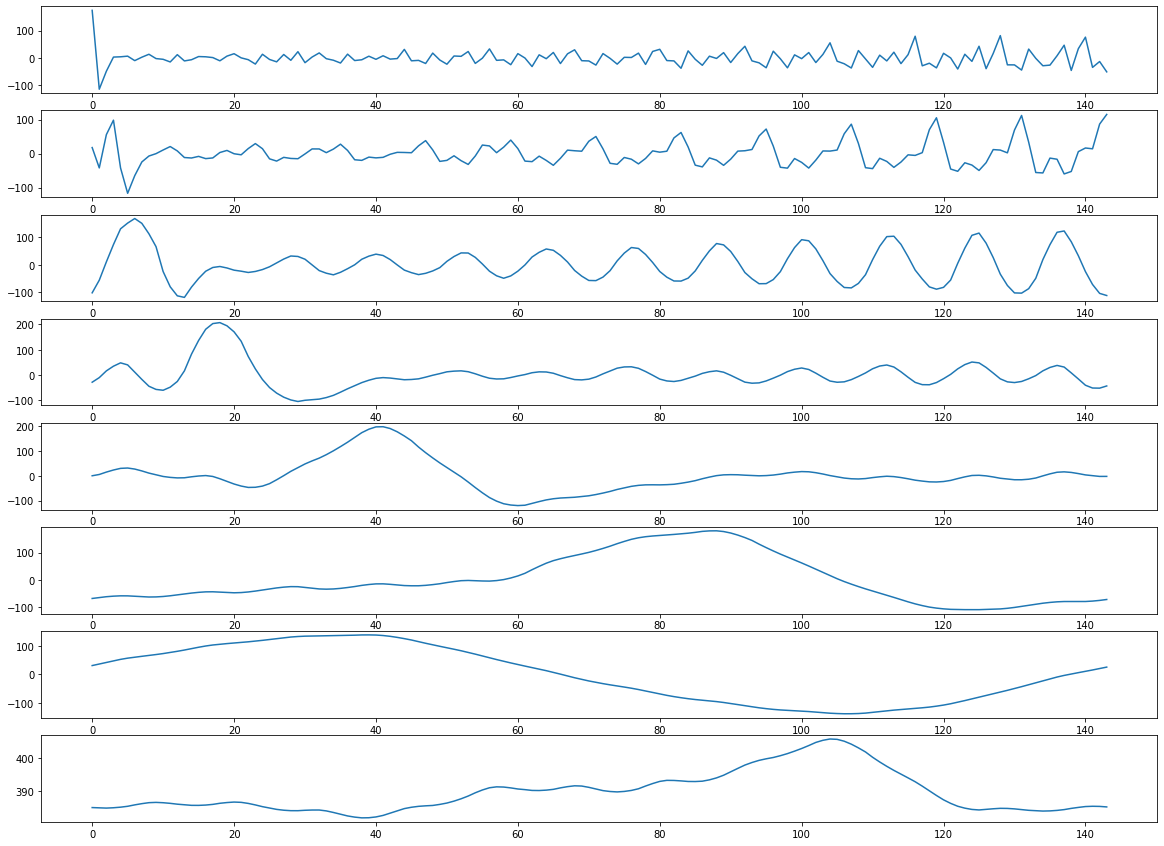

In [9]:
plt.rcParams['figure.figsize'] = (20,15)
level = 7
wavelets = modwt(df.Sales,'db2',level)
fig, ax = plt.subplots(len(wavelets))

for i, wavelet in enumerate(wavelets):
    ax[i].plot(wavelet)


In [10]:
wave = modwt(df.Sales,'db2',level)

# Adaptive ARIMA

In [11]:
plt.rcParams['figure.figsize'] = (10,6)
for i in range(level+1):
    print("Level-",i,"->",end = ' ')
    X = wavelets[i]
    train = X[:134]
    test  = X[134:]
    set_order = order_p_d_q(train)
    model_arima = ARIMA(train,set_order)
    model_arima_fit = model_arima.fit()
    predictions = model_arima_fit.forecast(steps = 10)[0]
    wavelets[i][134:] = predictions

Level- 0 -> (6, 0, 1) 1164.7221881638075
Level- 1 -> (8, 0, 0) 1007.2460477564211
Level- 2 -> (8, 2, 5) 762.8938516969954
Level- 3 -> (9, 1, 7) 629.6153444563023
Level- 4 -> (8, 1, 4) 451.51480153688084
Level- 5 -> (9, 2, 5) 229.2105141465413
Level- 6 -> (2, 2, 6) 1.3589908931143668
Level- 7 -> (0, 2, 0) -74.47939650470383


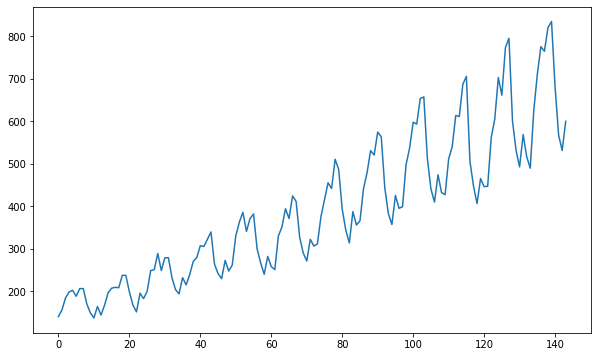

In [12]:
re_built = imodwt(wavelets,'db2')
plt.plot(re_built)

# Wavelet

In [13]:
for i in range(level+1):
    X = wave[i]
    train = X[:134]
    test = X[134:]
    model_arima = ARIMA(train,order = (7,1,1))
    model_arima_fit = model_arima.fit()
    predictions = model_arima_fit.forecast(steps = 10)[0]
    wave[i][134:] = predictions

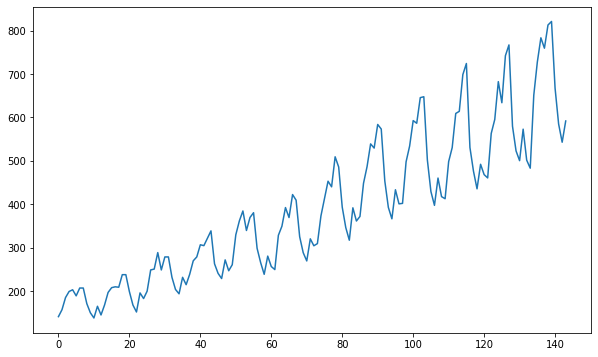

In [14]:
plt.rcParams['figure.figsize'] = (10,6)
re_built1 = imodwt(wave, 'db2')
plt.plot(re_built1)

# Arima

In [15]:
X = df.values
train = X[:134]
test = X[134:]
predictions = []

In [16]:
model_arima = ARIMA(train,order = (7,1,1))
model_arima_fit = model_arima.fit()
predictions = model_arima_fit.forecast(steps = 10)[0]
model_arima_fit.aic

1290.1456307536082

# LSTM

In [44]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [45]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('Tractor_Sales.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
Dataset_LSTM = dataset
dataframe.head()

,Sales
0,141
1,157
2,185
3,199
4,203


In [46]:
# convert an array of values into a dataset matrix
def create_dataset_LSTM(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)+1-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
# normalize the dataset   y = (x - min) / (max - min) convert all values between 0 and 1
# because Some time series data calculated in different scale so we do first normalization to convert in into one scale

scaler = MinMaxScaler(feature_range = (0, 1))   
Dataset_LSTM = scaler.fit_transform(Dataset_LSTM)
#maxi = numpy.amax(dataset)   #find maximum value from dataset
#mini = numpy.amin(dataset)   #find minimum value from dataset
#y = (dataset-mini)/(maxi - mini)    # same thing does by MinMaxScalar function

In [48]:
# split into train and test sets

train_LSTM = Dataset_LSTM[:140]
test_LSTM = Dataset_LSTM[104:]

print("Train length = ",train_LSTM.size)
print("Test length = ",test_LSTM.size)

Train length =  140
Test length =  40


In [49]:
# reshape into X = t and Y=t+1
look_back = 30
train_X, train_Y = create_dataset_LSTM(train_LSTM, look_back)
test_X, test_Y = create_dataset_LSTM(test_LSTM, look_back)
train_X.size

3300

In [50]:
# reshape input to be [samples, time steps, features]

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
train_X.shape

(110, 1, 30)

In [51]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(train_X, train_Y, epochs = 35, batch_size=1, verbose=2,)

Epoch 1/35
 - 1s - loss: 0.0672
Epoch 2/35
 - 0s - loss: 0.0141
Epoch 3/35
 - 0s - loss: 0.0104
Epoch 4/35
 - 0s - loss: 0.0076
Epoch 5/35
 - 0s - loss: 0.0052
Epoch 6/35
 - 0s - loss: 0.0052
Epoch 7/35
 - 0s - loss: 0.0039
Epoch 8/35
 - 0s - loss: 0.0038
Epoch 9/35
 - 0s - loss: 0.0033
Epoch 10/35
 - 0s - loss: 0.0031
Epoch 11/35
 - 0s - loss: 0.0033
Epoch 12/35
 - 0s - loss: 0.0029
Epoch 13/35
 - 0s - loss: 0.0031
Epoch 14/35
 - 0s - loss: 0.0025
Epoch 15/35
 - 0s - loss: 0.0024
Epoch 16/35
 - 0s - loss: 0.0022
Epoch 17/35
 - 0s - loss: 0.0020
Epoch 18/35
 - 0s - loss: 0.0022
Epoch 19/35
 - 0s - loss: 0.0018
Epoch 20/35
 - 0s - loss: 0.0018
Epoch 21/35
 - 0s - loss: 0.0018
Epoch 22/35
 - 0s - loss: 0.0014
Epoch 23/35
 - 0s - loss: 0.0016
Epoch 24/35
 - 0s - loss: 0.0013
Epoch 25/35
 - 0s - loss: 0.0016
Epoch 26/35
 - 0s - loss: 0.0012
Epoch 27/35
 - 0s - loss: 0.0011
Epoch 28/35
 - 0s - loss: 0.0012
Epoch 29/35
 - 0s - loss: 0.0012
Epoch 30/35
 - 0s - loss: 0.0012
Epoch 31/35
 - 0s -

In [52]:
# make predictions
train_Predict = model.predict(train_X)
test_Predict = model.predict(test_X)

In [53]:
# invert predictions
train_Predict = scaler.inverse_transform(train_Predict)
train_Y = scaler.inverse_transform([train_Y])
test_Predict = scaler.inverse_transform(test_Predict)
test_Y = scaler.inverse_transform([test_Y])

In [54]:
# split into train and test sets

Train = dataset[:140]
Test = dataset[104:]
print("Train length = ",Train.size)
print("Test length = ",Test.size)

Train length =  140
Test length =  40


In [55]:
# reshape into X = t and Y=t+1

look_back = 30
Train_X, Train_Y = create_dataset_LSTM(Train, look_back)
Test_X, Test_Y = create_dataset_LSTM(Test, look_back)
Test_Y

array([587., 710., 793., 749., 871., 848., 640., 581., 519., 605.],
      dtype=float32)

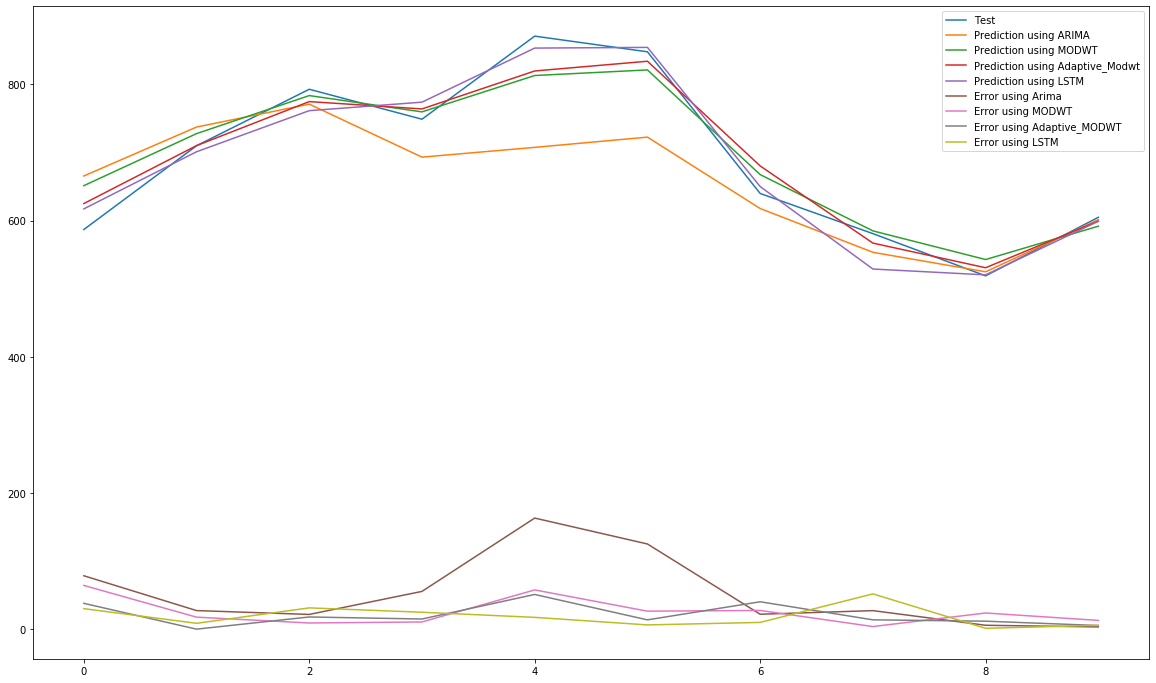

In [65]:
plt.rcParams['figure.figsize'] = (20,12)
array1 = predictions
array2 = re_built1[134:]
array3 = re_built[134:]
array4 = test_Predict

error1 = []
error2 = []
error3 = []
error4 = []
            
for i in range(len(array1)):
    error1.append(abs(test[i]-array1[i]))
for i in range(len(array1)):
    error2.append(abs(test[i]-array2[i]))
for i in range(len(array1)):
    error3.append(abs(test[i]-array3[i]))
for i in range(len(array1)):
    error4.append(abs(test[i]-array4[i]))

plt.plot(Test_Y,label = 'Test')

plt.plot(predictions,label = 'Prediction using ARIMA')
plt.plot(re_built1[134:],label = 'Prediction using MODWT')
plt.plot(re_built[134:],label = 'Prediction using Adaptive_Modwt')
plt.plot(test_Predict,label = 'Prediction using LSTM')

plt.plot(error1,label = 'Error using Arima')
plt.plot(error2,label = 'Error using MODWT')
plt.plot(error3,label = 'Error using Adaptive_MODWT')
plt.plot(error4,label = 'Error using LSTM')

plt.legend()

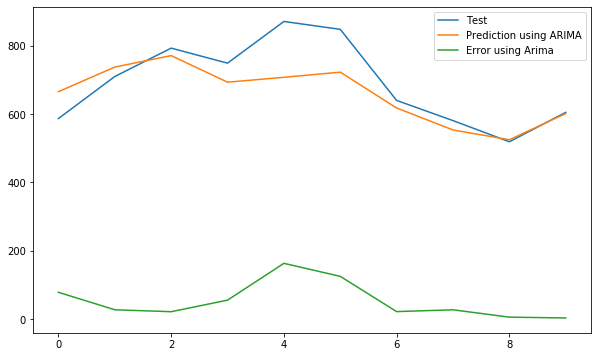

In [66]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(test,label = 'Test')
plt.plot(predictions,label = 'Prediction using ARIMA')
plt.plot(error1,label = 'Error using Arima')
plt.legend()

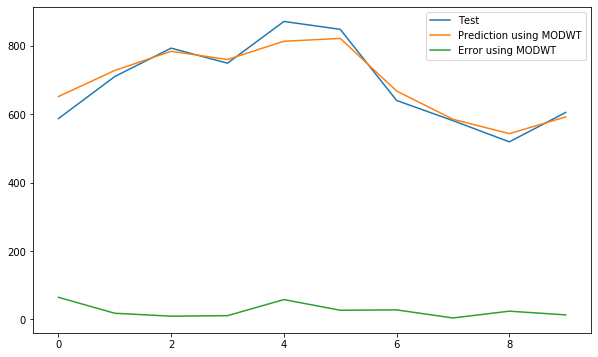

In [67]:
plt.plot(test,label = 'Test')
plt.plot(re_built1[134:],label = 'Prediction using MODWT')
plt.plot(error2,label = 'Error using MODWT')
plt.legend()

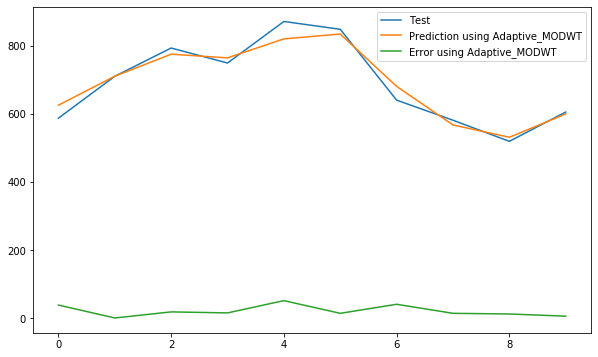

In [68]:
plt.plot(test,label = 'Test')
plt.plot(re_built[134:],label = 'Prediction using Adaptive_MODWT')
plt.plot(error3,label = 'Error using Adaptive_MODWT')
plt.legend()

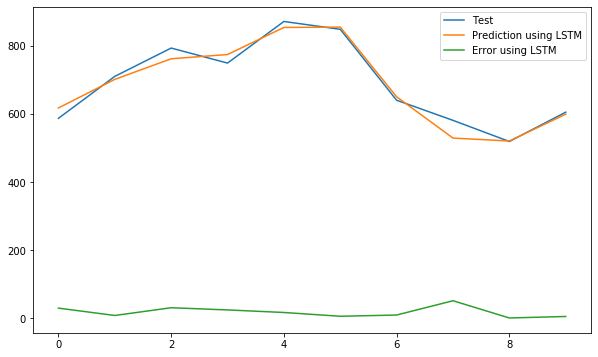

In [69]:
plt.plot(test,label = 'Test')
plt.plot(test_Predict,label = 'Prediction using LSTM')
plt.plot(error4,label = 'Error using LSTM')
plt.legend()

In [61]:
dat = pd.DataFrame(test)
dat.insert(1,'ARIMA',predictions)
dat.insert(2,'MODWT',re_built1[134:])
dat.insert(3,'Adaptive_MODWT',re_built[134:])
dat.insert(4,'LSTM',test_Predict)
dat = dat.rename(columns = {0:"Original",1:"Arima",2:"MODWT",3:"Adaptive_MODWT",4:"LSTM"})
dat

,Original,ARIMA,MODWT,Adaptive_MODWT,LSTM
0,587,665.642261,651.418411,625.130865,617.325439
1,710,737.492899,727.847578,710.229233,701.209900
2,793,771.158275,783.717401,774.881920,761.544556
3,749,693.329564,759.775244,764.097591,774.046509
4,871,707.668232,813.172671,819.830790,853.451111
5,848,722.703689,821.372848,834.137888,854.458008
6,640,617.880750,667.668270,680.430517,650.124451
7,581,553.585690,585.042304,567.092185,529.014648
8,519,524.933157,542.953068,530.918096,520.456055
9,605,601.507727,591.922699,599.422915,599.144104


In [62]:
from sklearn.metrics import mean_squared_error

MSE_ARIMA          = mean_squared_error(dat.Original,dat.ARIMA)
MSE_MODWT          = mean_squared_error(dat.Original,dat.MODWT)
MSE_Adaptive_MODWT = mean_squared_error(dat.Original,dat.Adaptive_MODWT)
MSE_LSTM           = mean_squared_error(dat.Original,dat.LSTM)

print("Mean Squared error using ARIMA          :",MSE_ARIMA)
print("Mean Squared error using MODWT          :",MSE_MODWT)
print("Mean Squared error using Adaptive_MODWT :",MSE_Adaptive_MODWT)
print("Mean Squared error using LSTM           :",MSE_LSTM)

Mean Squared error using ARIMA          : 5418.135887973398
Mean Squared error using MODWT          : 1025.018418487994
Mean Squared error using Adaptive_MODWT : 682.1862685303745
Mean Squared error using LSTM           : 580.4732986196875


In [63]:
def MAPE(Error,Test):
    percentage = 0
    for i in range(len (Test)):
        percentage += abs(Error[i]/Test[i])*100
    percentage = percentage/len(Test)    
    return percentage[0]

MAPE_ARIMA          = MAPE(error1,test)
MAPE_MODWT          = MAPE(error2,test)
MAPE_Adaptive_MODWT = MAPE(error3,test)
MAPE_LSTM           = MAPE(error4,test)

print("Mean Absolute Percentage error using ARIMA          :",MAPE_ARIMA,'%')
print("Mean Absolute Percentage error using MODWT          :",MAPE_MODWT,'%')
print("Mean Absolute Percentage error using Adaptive_MODWT :",MAPE_Adaptive_MODWT,'%')
print("Mean Absolute Percentage error using LSTM           :",MAPE_LSTM,'%')

Mean Absolute Percentage error using ARIMA          : 7.087925734386187 %
Mean Absolute Percentage error using MODWT          : 3.767197504595702 %
Mean Absolute Percentage error using Adaptive_MODWT : 3.0267305174247 %
Mean Absolute Percentage error using LSTM           : 2.826918005565737 %
